# Week 14 Programming Assignment

As you're working on identifying data for your final project, it's helpful to spend some time exploring your various data files.  For this week's assignment, I'd like you to take a few of the ideas from the the lectures, review assignment, and tonight's lecture to start exploring the data you plan to use for the final project.

For the following activities, you can use just one of the data files that you've identified, or you can do the activities using different data files.  That's up to you.  Please describe what you're doing in a Markdown cell or in the comments of your code.  When you've completed the assignment, submit it as normal.

### 1. Basic Statistics

Use Python to read in your data file and show many rows and columns your data has.

In [1]:
import pandas as pd
data = pd.read_csv("tuberculosis_data_WHO.csv")

data.shape

(6192, 9)

### 2. Data Diversity

Use Python to identify how many unique values each column in your data has.  Use Python to identify which column has the greatest number of distinct values (aka the most diversity)?  If your data has a unique identifier (e.g. a person or visit or record ID) then find the column with the next most number of unique values.

In [2]:
unique_counts = data.nunique()
print("Number of unique values in each column:")
for col, count in unique_counts.items():
    print(f"{col}: {count}")

# Find column with most unique values
most_diverse_col = unique_counts.idxmax()
most_diverse_count = unique_counts.max()

# Find second most diverse column
second_diverse_col = unique_counts[unique_counts < most_diverse_count].idxmax()
second_diverse_count = unique_counts[unique_counts < most_diverse_count].max()

print(f"\nColumn with most unique values: {most_diverse_col} ({most_diverse_count} unique values)")
print(f"Column with second most unique values: {second_diverse_col} ({second_diverse_count} unique values)")

# Display first few rows of these columns
print(f"\nSample values from most diverse column ({most_diverse_col}):")
print(data[most_diverse_col].head())
print(f"\nSample values from second most diverse column ({second_diverse_col}):")
print(data[second_diverse_col].head())

Number of unique values in each column:
Indicator: 4
PUBLISH STATES: 1
Year: 8
WHO region: 6
World Bank income group: 4
Country: 194
Numeric: 959
Low: 791
High: 1097

Column with most unique values: High (1097 unique values)
Column with second most unique values: Numeric (959 unique values)

Sample values from most diverse column (High):
0       640.0
1         1.1
2         1.8
3      1100.0
4    210000.0
Name: High, dtype: float64

Sample values from second most diverse column (Numeric):
0       576.0
1         1.0
2         1.8
3       630.0
4    130000.0
Name: Numeric, dtype: float64


### 3. Data Redundancy

Use Python to identify any columns in your data where the value for every row is the same.  For example, if you had a gender column and all the rows said 'M', then you would want to write the code that helped you determine that.

In [3]:
constant_columns = []
constant_values = {}

for column in data.columns:
    if data[column].nunique() == 1:
        constant_columns.append(column)
        constant_values[column] = data[column].iloc[0]

# Display results
if constant_columns:
    print("Columns with constant values:")
    for column in constant_columns:
        print(f"Column '{column}' has value '{constant_values[column]}' in all rows")
else:
    print("No columns found where all values are the same")

# Show example rows for verification
if constant_columns:
    print("\nFirst few rows of constant columns for verification:")
    print(data[constant_columns].head())

Columns with constant values:
Column 'PUBLISH STATES' has value 'Published' in all rows

First few rows of constant columns for verification:
  PUBLISH STATES
0      Published
1      Published
2      Published
3      Published
4      Published


### 4. Range of Values

Your data almost certainly has some numeric columns that can be summed or averaged.  Create a histogram that shows the distribution of values for this column.

Text(0, 0.5, 'Frequency')

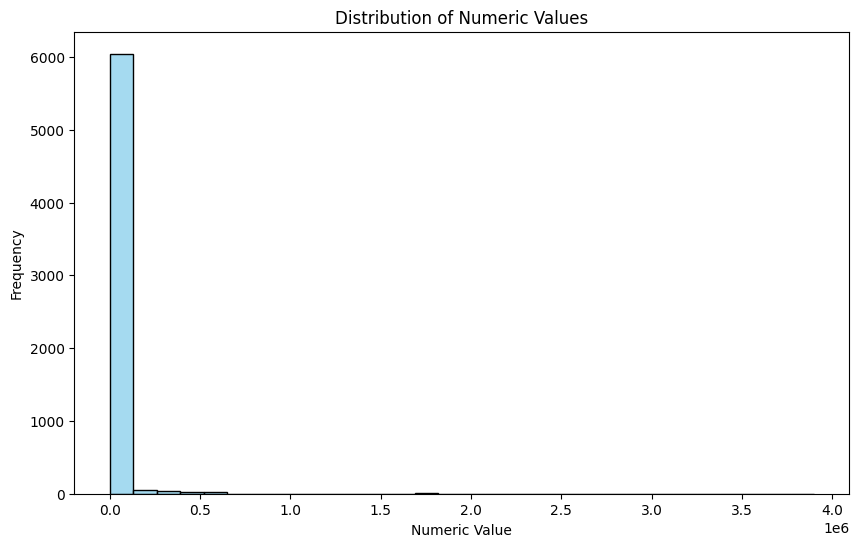

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set figure size
plt.figure(figsize=(10, 6))

# Create histogram
sns.histplot(data=data['Numeric'], bins=30, color='skyblue')

# Add title and labels
plt.title('Distribution of Numeric Values')
plt.xlabel('Numeric Value')
plt.ylabel('Frequency')

### 5. Discussion

Do any additional exploration of this data that you think may be interesting and include your code here.  Then go onto Slack and make a post about what you've observed.  Share your observation.  Share your code, if you like.  Share a screenshot of the data or a chart based on the data.

Then comment on at least two other people's observations that they share on Slack.  (Use the reply as thread option in Slack to keep the conversation organized.)

In [5]:
missing_values = data.isnull().sum()
missing_percentages = (missing_values / len(data)) * 100
missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentages
})

missing_summary = missing_summary[missing_summary['Missing Values'] > 0].sort_values('Missing Values', ascending=False)

print("Summary of Missing Values:")
print(missing_summary)

Summary of Missing Values:
      Missing Values  Percentage Missing
Low               40            0.645995
High              40            0.645995




---



## Submitting Your Work

Submit your work as usual.